In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import (
    Dense,
    Input,
    Dropout,
    GlobalAveragePooling2D,
    Flatten,
    Conv2D,
    BatchNormalization,
    Activation,
    MaxPooling2D,
)
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop


In [5]:
picture_size = 48
# standardizing the size of each and every picture so i am choosing the 48 X 48
folder_path = "images/"
# defining folder path


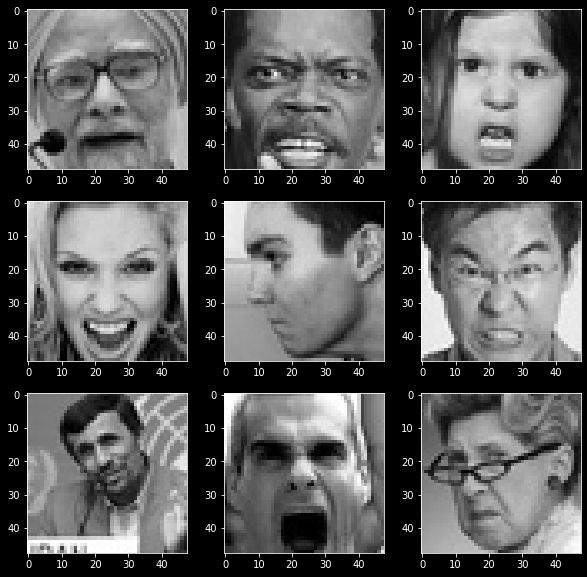

In [15]:
expression = "angry"
# plotting some 'angry' label images

plt.style.use('dark_background')
plt.figure(figsize=(10, 10)) 
# total size of the figure 
# 10 X 10 = L X B in which the 9 images are there
for i in range(1, 10, 1):
    # picking 9 images serially
    plt.subplot(3, 3, i)
    # plotting 9 images in to 3 X 3 grid
    img = load_img(
        folder_path
        + "train/"
        + expression
        + "/"
        + os.listdir(folder_path + "train/" + expression)[i],
        target_size=(picture_size, picture_size),
    )
    # loading images path from 1 to 9 via loop
    plt.imshow(img)
    # showing the images
plt.show()
# showing the figure

In [12]:
batch_size = 128
# batch size - It depicts that how many training example your model 
# should take in one(1) iteration
# 128 training file at a time i.e; 128 images at a time

datagen_train = ImageDataGenerator()
datagen_val = ImageDataGenerator()
# Data Generators is one of the most useful features of the Keras API. 
# Consider a scenario where you have lots of data, so much that you cannot 
# have all of it at once in the RAM. Wyd? Purchasing more RAM is obviously 
# isn’t an option.
# Well, the solution to this can be loading the mini-batches fed to the 
# model dynamically. This is exactly what data generators do. They can 
# generate the model input dynamically thus forming a pipeline from 
# the storage to the RAM to load the data as and when it is required. 
# Another advantage of this pipeline is, one can easily apply preprocessing 
# routines on these mini-batches of data as they are prepared to feed the model.

train_set = datagen_train.flow_from_directory(
    folder_path + "train",
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
)
# creating training set from the training images

test_set = datagen_val.flow_from_directory(
    folder_path + "validation",
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
)
# creating testing set from the testing images


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


## building model

In [18]:
no_of_classes = 7

model = Sequential()
# sequential means single input & single output; not multi input not multi output

# There are two ways to build Keras models: sequential and functional.

# The sequential API allows you to create models layer-by-layer for most problems. 
# It is limited in that it does not allow you to create models that share layers 
# or have multiple inputs or outputs.

# Alternatively, the functional API allows you to create models that have a 
# lot more flexibility as you can easily define models where layers connect 
# to more than just the previous and next layers. In fact, you can connect 
# layers to (literally) any other layer. As a result, creating complex 
# networks such as siamese networks and residual networks become possible.

# 1st CNN layer
model.add(Conv2D(64, (3, 3), padding="same", input_shape=(48, 48, 1)))
# https://developers.google.com/machine-learning/practica/image-classification/convolutional-neural-networks?hl=id
# Keras Conv2D is a 2D Convolution Layer, this layer creates a convolution 
# kernel that is wind with layers input which helps produce a tensor of output

# Kernel: In image processing kernel is a convolution matrix or masks which 
# can be used for blurring, sharpening, embossing, edge detection, and 
# more by doing a convolution between a kernel and an image.

# keras.layers.Conv2D(filters, kernel_size, strides=(1, 1),
#   padding='valid', data_format=None, dilation_rate=(1, 1),
#   activation=None, use_bias=True, kernel_initializer='glorot_uniform',
#   bias_initializer='zeros', kernel_regularizer=None,
#   bias_regularizer=None, activity_regularizer=None,
#   kernel_constraint=None, bias_constraint=None)

# Padding = "same" -> You can instead preserve spatial dimensions of the 
# volume such that the output volume size matches the input volume size, 
# by setting the value to the “same”.

model.add(BatchNormalization())
# https://www.youtube.com/watch?v=wJ60luXn5Ns
# Batch normalization is a layer that allows every layer of the network 
# to do learning more independently

model.add(Activation("relu"))
# ReLU
# Following each convolution operation, the CNN applies a Rectified Linear Unit (ReLU) 
# transformation to the convolved feature, in order to introduce nonlinearity 
# into the model. The ReLU function, , returns x for all values of x > 0, 
# and returns 0 for all values of x ≤ 0.

model.add(MaxPooling2D(pool_size=(2, 2)))
# https://developers.google.com/machine-learning/practica/image-classification/convolutional-neural-networks?hl=id

model.add(Dropout(0.25))

# 2nd CNN layer
model.add(Conv2D(128, (5, 5), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd CNN layer
model.add(Conv2D(512, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th CNN layer
model.add(Conv2D(512, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation="softmax"))


opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_12 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 128)      

In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint(
    "./model.h5", monitor="val_acc", verbose=1, save_best_only=True, mode="max"
)

early_stopping = EarlyStopping(
    monitor="val_loss", min_delta=0, patience=3, verbose=1, restore_best_weights=True
)

reduce_learningrate = ReduceLROnPlateau(
    monitor="val_loss", factor=0.2, patience=3, verbose=1, min_delta=0.0001
)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 48

model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"],
)


In [ ]:
history = model.fit_generator(
    generator=train_set,
    steps_per_epoch=train_set.n // train_set.batch_size,
    epochs=epochs,
    validation_data=test_set,
    validation_steps=test_set.n // test_set.batch_size,
    callbacks=callbacks_list,
)


In [ ]:
plt.style.use("dark_background")

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.suptitle("Optimizer : Adam", fontsize=10)
plt.ylabel("Loss", fontsize=16)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend(loc="upper right")

plt.subplot(1, 2, 2)
plt.ylabel("Accuracy", fontsize=16)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend(loc="lower right")
plt.show()


#https://developers.google.com/machine-learning/crash-course/framing/ml-terminology?hl=id